In [220]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Colormap for time
import scienceplots
plt.style.use(['science','nature','no-latex','vibrant'])


from scipy.optimize import curve_fit
from scipy.optimize import minimize

#Import personal functions
import sys
#sys.path.append("C:/Users/Olivi/OneDrive - TU Eindhoven/Soft robotic matter/GitHub/Thermal_Soft_Robotics/Functions")
sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot


In [221]:
#Location = r"C:\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\data_analysis"
Location = r"//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Thermal_actuation/Experimental/Fluidic/Rothmund_Pressure_release"
Foldernames = ["/Data/v3_length"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

print(data[0][-1].head)

Loading... Folder 1 of 1, Sample 1 of 4
Loading... Folder 1 of 1, Sample 2 of 4
Loading... Folder 1 of 1, Sample 3 of 4
Loading... Folder 1 of 1, Sample 4 of 4
<bound method NDFrame.head of          presFesto-0  DigOut-1   AWM5-12  SSCDP05-3      Time
0          -0.000191       0.0  0.000852  33.837551     0.001
1          -0.000161       0.0  0.000936  24.177348     0.002
2          -0.000127       0.0  0.001035  16.034245     0.003
3          -0.000091       0.0  0.001144   9.297275     0.004
4          -0.000053       0.0  0.001260   3.855477     0.005
...              ...       ...       ...        ...       ...
1614595     0.000111       1.0  0.000824  39.138304  1614.596
1614596     0.000074       1.0  0.000842  41.413824  1614.597
1614597     0.000029       1.0  0.000864  44.424798  1614.598
1614598    -0.000023       1.0  0.000894  48.234578  1614.599
1614599    -0.000082       1.0  0.000933  52.906515  1614.600

[1614600 rows x 5 columns]>


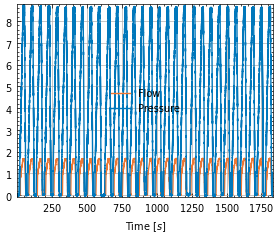

In [33]:
#Plot the profiles over time
#k =0
for i, df in enumerate(data[0]):
    if 'AWM5-5' in df.columns:
        flow = data[0][i]['AWM5-5'].values
    elif 'AWM5-12' in df.columns:
        flow = data[0][i]['AWM5-12'].values


    time = data[0][i]['Time']
    #P_setpoint = data[0][i]['presFesto-1'].values
    # Check which sensor data is available in the DataFrame columns
    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
    #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'presFesto-1' in df.columns:
        P_setpoint = data[0][i]['presFesto-1'].values
    elif 'presFesto-0' in df.columns:
        P_setpoint = data[0][i]['presFesto-0'].values

    else:
        print(f"Skipping experiment {i+1}: No recognizable sensor data.")
        # Skip this iteration and move to the next experiment

    if i ==0:
        break
        
#with plt.style.context(['science','nature','no-latex','vibrant']):
    #plt.style.use(['no-latex'])
fig, ax = plt.subplots()  # Set figure size here
ax.plot(time, flow, label='Flow')
ax.plot(time, P/1000, label="Pressure")
ax.autoscale(tight=True)
ax.legend()
ax.set_xlabel('Time [$s$]')
ax.grid()
plt.show()


In [ ]:
data[1]

In [49]:
plt.figure()  # Create a new figure for each experiment
for i, df in enumerate(data[0]):
    
    # Check which sensor data is available in the DataFrame columns
    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
    #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    else:
        print(f"Skipping experiment {i+1}: No recognizable sensor data.")
        continue  # Skip this iteration and move to the next experiment
   
        
    # Assuming Time is common in all DataFrames and is in a column named 'Time'
    #Time = df['Time'].values
    flow = data[0][i]['AWM5-5'].values #SLPM

    plt.scatter( P/1000,flow, label=data[1]['Samplename'][i][5:],marker='.', linewidth=0.000001)
    plt.xlabel('Pressure [$kPa$]')
    plt.ylabel('Flow [$SLPM$]')
    plt.legend(loc='upper left')
    if i==3:
        break 
  
#plt.xlim(0,8) 
plt.grid()
#plt.xlim(0,5)
plt.show() 

KeyError: 'AWM5-5'

<Figure size 640x480 with 0 Axes>

Prepare data: slice per run

In [227]:
# Digi-out is reversed in fluidic 1. ds30_r9_T100_L05
data[0][3]['DigOut-1'] = [1 if x==0 else 0 for x in data[0][3]['DigOut-1']]



In [228]:
# Slice data per run 

data_sliced = []
for index,value in enumerate(data[0]):
    runs = [] # new list for all the runs in data[0]
    start = 0
    run_count = 1  # Counter for run numbe
    #flow = data[0][index]['AWM5-5'].values

    # Check which pressure sensor is used 
    df = data[0][index]
    print(index)

    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    
    if 'AWM5-5' in df.columns:
        flow = data[0][index]['AWM5-5'].values
    elif 'AWM5-12' in df.columns:
        flow = data[0][index]['AWM5-12'].values

    else:
        print(f"Skipping experiment {i+1}: No recognizable pressure sensor data.")
        continue  # Skip this iteration and move to the next experiment

    while start < len(data[0][index]['DigOut-1']):
        start = np.argmax(data[0][index]['DigOut-1'][start:] == 1) +start  # Correcting index for slicing
        end = np.argmax(data[0][index]['DigOut-1'][start:] == 0)+start   # Correcting index for slicing
        
        if end <= start:  # Break if no more valid segments are found
            break

        # Reschale the flow data to compensate for drifting 
        first_value = flow[start]
        flow_rescaled =flow[start:end] - first_value
      
        # Create a DataFrame for this run
        run_df = pd.DataFrame({
            'Time': np.arange(start, end),  # You can replace this with the actual time data if you have it
            'Rescaled_Flow': flow_rescaled[:end - start],
            'Pressure': P[start:end]/1000   # Assuming P is already an array
        })

        # Append this DataFrame to the list
        runs.append(run_df)   

        start = end + 5  # Move to next segment
        run_count += 1  # Increment run counter
    data_sliced.append(runs)

#Remove wrong measurement
#data_sliced[0].pop(8)   # touched setup with finger and messed up flow measurement


0
1
2
3


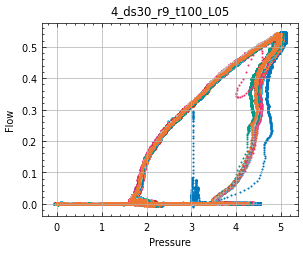

In [229]:
qq = 3
for uu, yy in enumerate(data_sliced[qq]):
    Q = yy['Rescaled_Flow']
    P = yy['Pressure']
    plt.scatter(P, Q,marker='.', linewidth=0.000001)
#plt.legend()
plt.title(data[1]['Samplename'][qq])
plt.xlabel('Pressure')
plt.ylabel('Flow')
plt.grid()
plt.show()   


In [ ]:
len(data_sliced)

Extract opening and closing pressure

In [230]:

# Function for moving average smoothing
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Plot sliced data and extract opening pressure 
P_open = []
P_close = []

open_threshold = 0.1 # slpm
close_threshold = 0.09 # slpm

# Window size for smoothing
window_size = 100  # You can adjust this value based on your requirements

# Initialize a flag to indicate whether the threshold has been crossed from below
crossed_threshold = False

for sample in data_sliced:   
    # Initialize lists for each sample
    P_open_sample = []
    P_close_sample = []
    
    for run in sample:
        Q_raw = run['Rescaled_Flow']
        P_raw = run['Pressure']
        
        # Apply moving average smoothing
        Q = moving_average(Q_raw, window_size)
        P_sliced = moving_average(P_raw, window_size)
        
        # Extract opening pressure
        opening_index = np.argmax(Q > open_threshold)  # If the flow passes a certain threshold, then we can assume it is open
        P_open_sample.append(P_sliced[opening_index])  # Use previous index to recover the pressure 
        
        # Loop through the data
        for jj in range(1, len(Q)):
            # Check for crossing the threshold from below to above
            if Q[jj] > close_threshold:
                crossed_threshold = True
            
            # Check for crossing the threshold from above to below after it's been crossed from below
            if crossed_threshold and Q[jj] < close_threshold:
                P_close_sample.append(P_sliced[jj])
                
                # Reset the flag if you are only interested in the first such occurrence
                crossed_threshold = False
                break
    
    # Append the lists for each sample to the main lists
    P_open.append(P_open_sample)
    P_close.append(P_close_sample)

Results

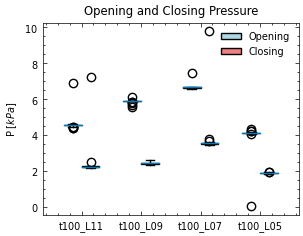

In [233]:
fig, ax = plt.subplots()

# Width of a boxplot
box_width = 0.3

# Positions of the opening pressure boxplots
open_positions = [x - box_width/2 for x in range(len(P_open))]

# Positions of the closing pressure boxplots
close_positions = [x + box_width/2 for x in range(len(P_close))]

# Plot the opening pressure boxplots
bp_open = ax.boxplot(P_open, positions=open_positions, widths=box_width, patch_artist=True, boxprops=dict(facecolor='lightblue'), labels=['Opening']*len(P_open))

# Plot the closing pressure boxplots
bp_close = ax.boxplot(P_close, positions=close_positions, widths=box_width, patch_artist=True, boxprops=dict(facecolor='lightcoral'), labels=['Closing']*len(P_close))

# Set the title and labels
plt.title("Opening and Closing Pressure")
plt.ylabel("P [$kPa$]")

# Set the x-ticks and labels
# Extract the part of the sample name after "t"
sample_names = data[1]['Samplename']
sample_names_after_t = ['t'+name.split('t')[-1] for name in sample_names]

# Set the x-ticks and labels
tick_positions = range(len(sample_names_after_t))
plt.xticks(tick_positions, sample_names_after_t)

# Show the legend
handles = [bp_open['boxes'][0], bp_close['boxes'][0]]
labels = ['Opening', 'Closing']
ax.legend(handles, labels)

plt.show()


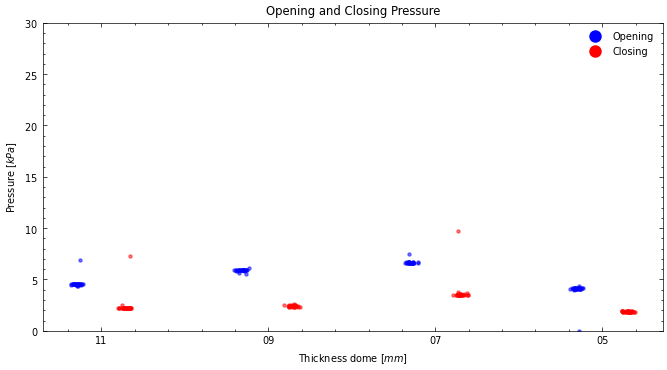

In [235]:
fig, ax = plt.subplots(figsize=(8,4))

# Width of a boxplot
box_width = 0.3

# Positions of the opening pressure boxplots
open_positions = [x - box_width / 2 for x in range(len(P_open))]

# Positions of the closing pressure boxplots
close_positions = [x + box_width / 2 for x in range(len(P_close))]

# Scatter plot of individual data points
for i, (open_data, close_data) in enumerate(zip(P_open, P_close)):
    x_open = np.random.normal(open_positions[i], 0.02, size=len(open_data))  # Add jitter to the x-values
    x_close = np.random.normal(close_positions[i], 0.02, size=len(close_data))  # Add jitter to the x-values

    ax.scatter(x_open, open_data, color='blue', alpha=0.5, s=5)  # Scatter plot for opening pressures
    ax.scatter(x_close, close_data, color='red', alpha=0.5, s=5)  # Scatter plot for closing pressures

# Set the title and labels
plt.title("Opening and Closing Pressure")
plt.ylabel("Pressure [$kPa$]")
plt.xlabel("Thickness dome [$mm$]")

# Set the x-ticks and labels
# Extract the part of the sample name after "t"
sample_names = data[1]['Samplename']
sample_names_after_t =  [name.split('L')[-1] for name in sample_names]

# Set the x-ticks and labels
tick_positions = range(len(sample_names_after_t))
plt.xticks(tick_positions, sample_names_after_t)

# Show the legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label='Opening', markerfacecolor='blue', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', label='Closing', markerfacecolor='red', markersize=10)]
labels = ['Opening', 'Closing']
ax.legend(handles, labels)
plt.ylim(0,30)

plt.show()


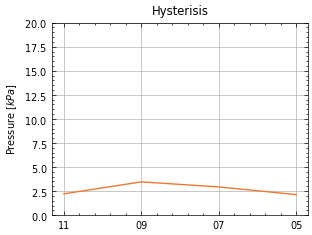

In [236]:
Hysteresis = [np.mean(po) - np.mean(pc) for po, pc in zip(P_open, P_close)]

plt.plot(Hysteresis)
tick_positions = range(len(sample_names_after_t))
plt.xticks(tick_positions, sample_names_after_t)
plt.ylabel('Pressure [$kPa$]')
plt.title('Hysterisis')
plt.ylim(0,20)
plt.grid()
plt.show()

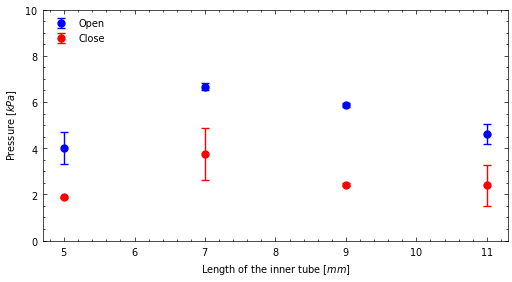

In [248]:
fig, ax = plt.subplots(figsize=(6,3))  # Set figure size here
open_mean = []
close_mean = []
open_positions = [11, 9, 7, 5]
for i, (open_data,close_data) in enumerate(zip(P_open,P_close)):
    open_avg = np.mean(open_data)
    close_avg = np.mean(close_data)
    open_std = np.std(open_data)
    close_std = np.std(close_data)

    open_mean.append(open_avg)
    close_mean.append(close_avg)
    
    if i==0:
        ax.errorbar(open_positions[i], open_avg, yerr=open_std, fmt='o', color='blue', markersize=5, capsize=3,label='Open')
        ax.errorbar(open_positions[i], close_avg, yerr=close_std, fmt='o', color='red', markersize=5, capsize=3,label='Close')
    else: 
        ax.errorbar(open_positions[i], open_avg, yerr=open_std, fmt='o', color='blue', markersize=5, capsize=3)
        ax.errorbar(open_positions[i], close_avg, yerr=close_std, fmt='o', color='red', markersize=5, capsize=3)

#sample_names = ['1','2','3']
#plt.xticks(open_positions,sample_names)
plt.xlabel('Length of the inner tube [$mm$]')
plt.ylabel('Pressure [$kPa$]')


plt.legend(loc='upper left')
ax.set_ylim(0,10)
plt.show()
 